C:\Users\mukul\AppData\Local\Temp\ipykernel_18388\1832529144.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
C:\Users\mukul\AppData\Local\Temp\ipykernel_18388\1832529144.py:75: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


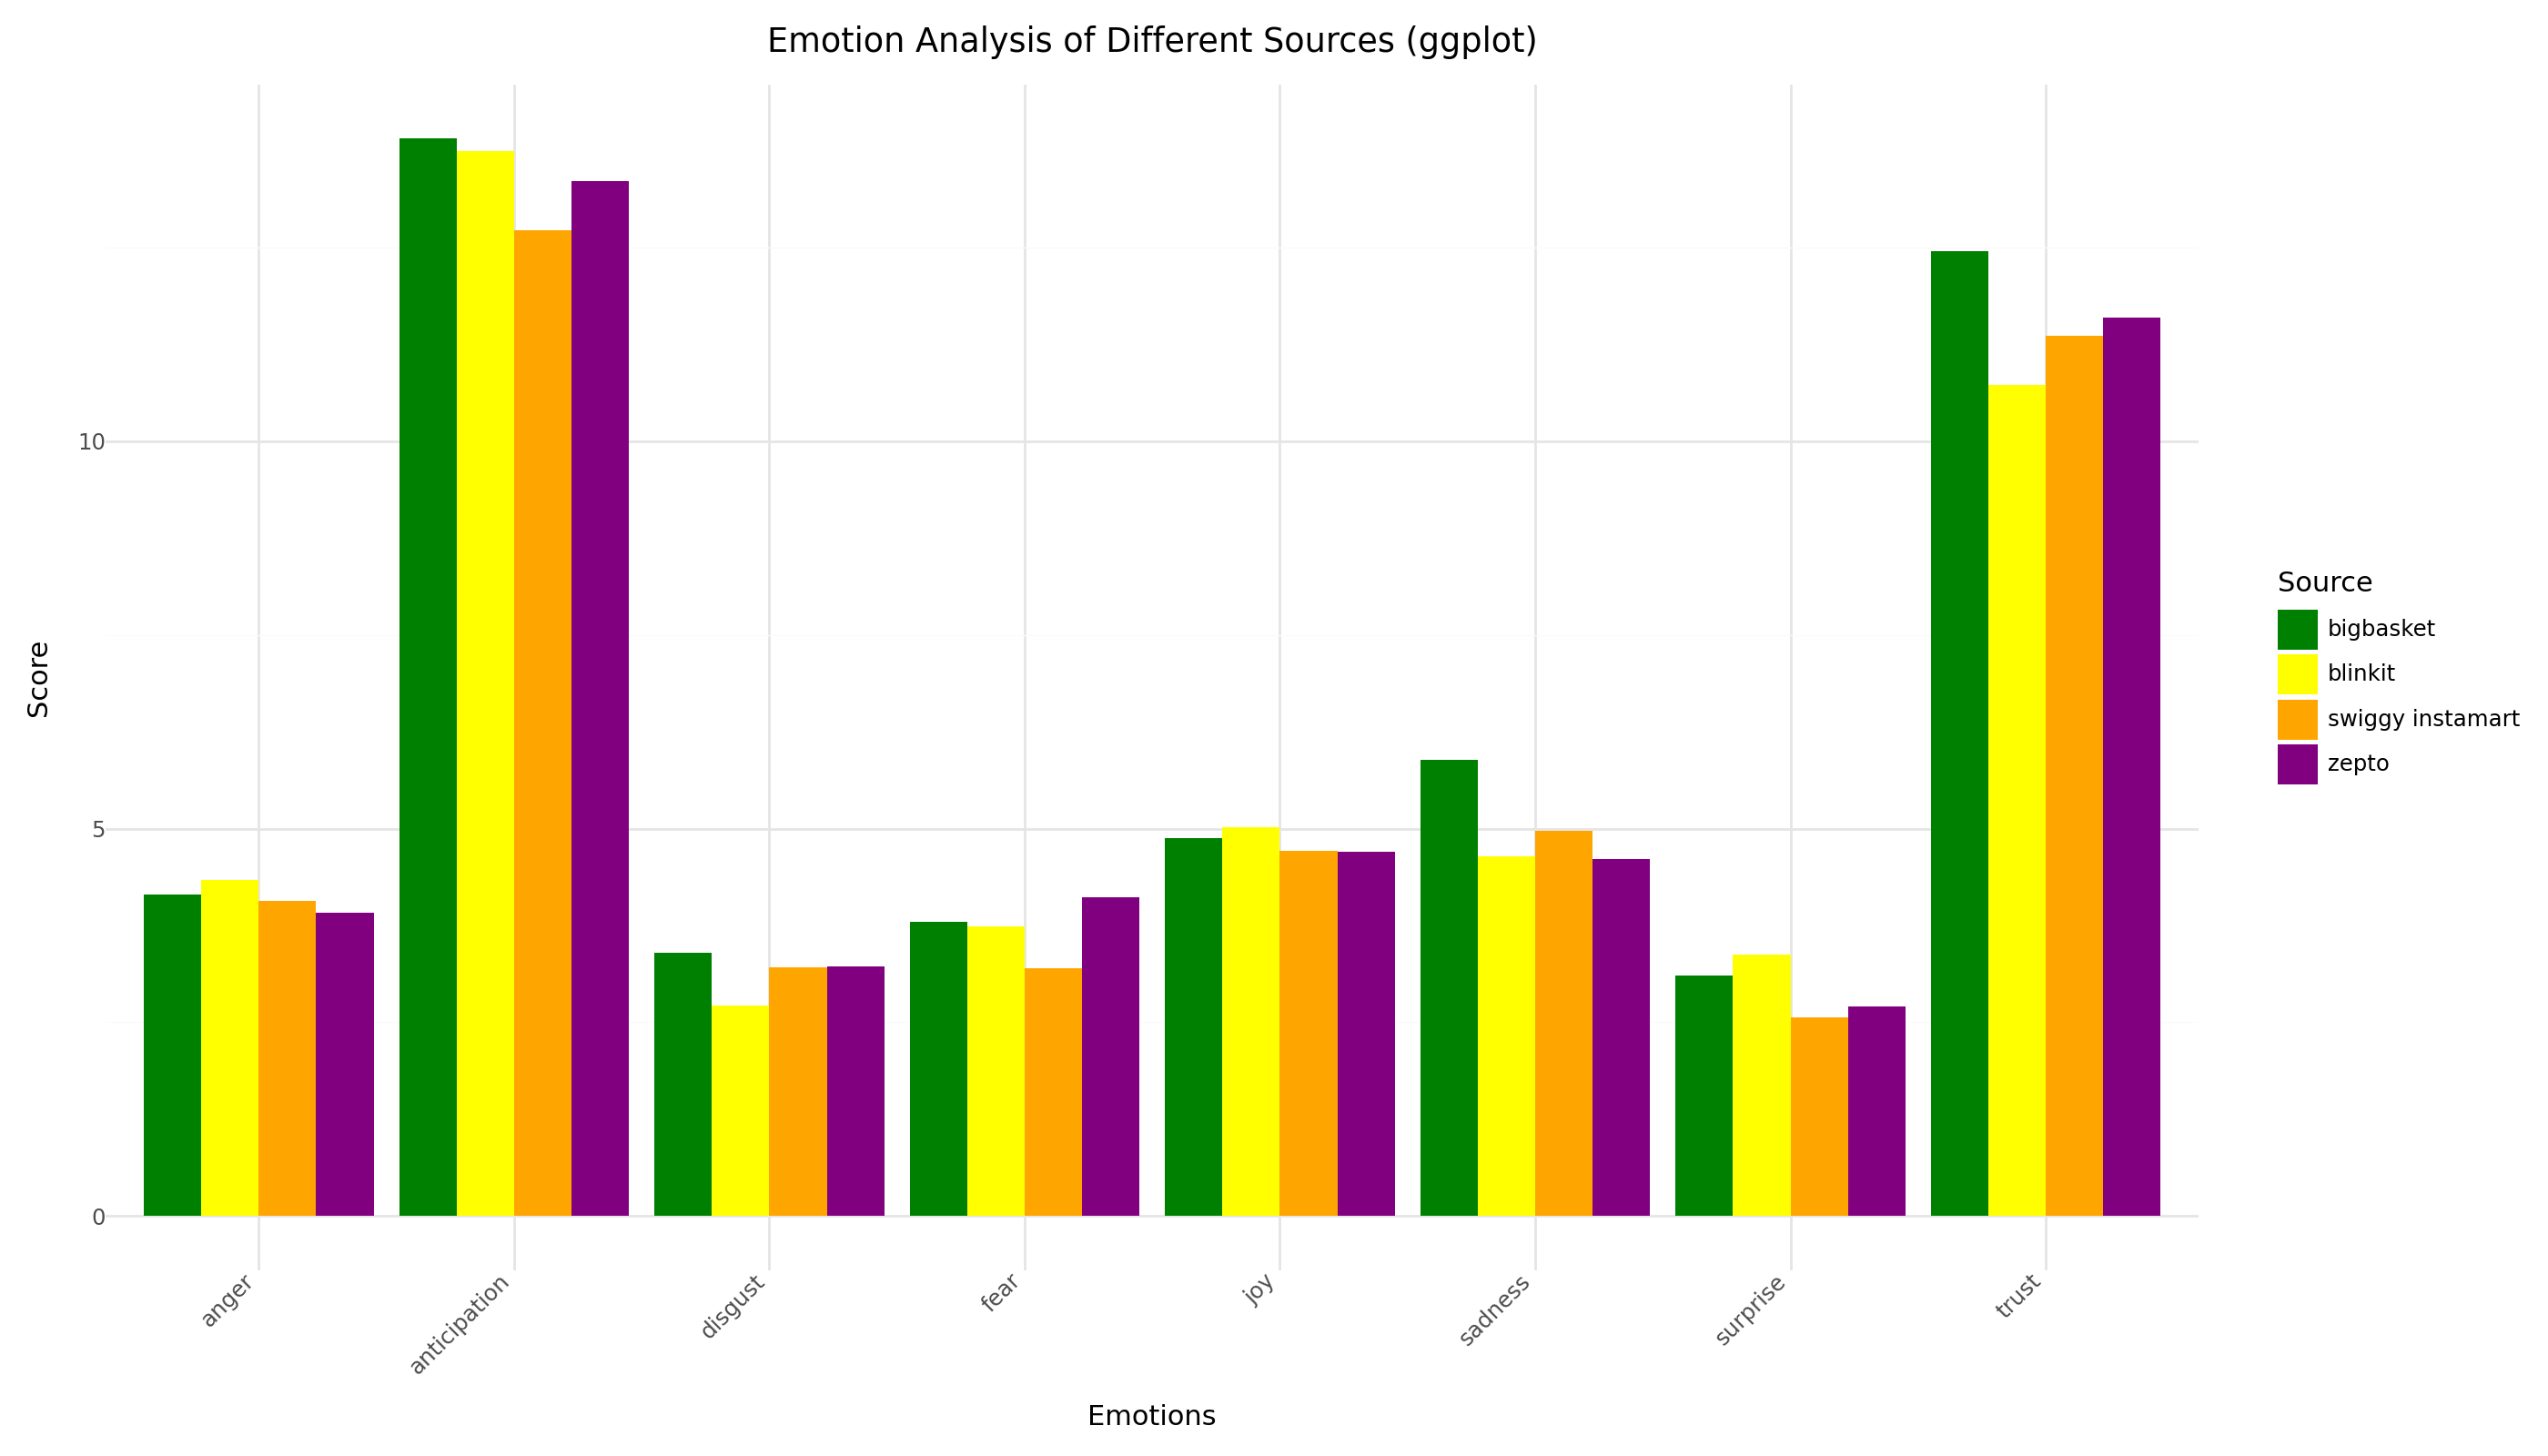

In [6]:
import numpy as np
import pandas as pd
from nrclex import NRCLex
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs, theme_minimal, scale_fill_manual

# List of CSV files and corresponding labels
csv_files = ['blinkit_processed_tweets.csv', 
             'bigbasket_processed_tweets.csv', 
             'zepto_processed_tweets.csv', 
             'swiggyinstamart_processed_tweets.csv']
legend_labels = ['blinkit', 'bigbasket', 'zepto', 'swiggy instamart']

# Function to filter emotions, removing 'positive', 'negative', and 'anticip'
def filter_emotions(emotion_dict):
    filtered_emotions = {emotion: freq for emotion, freq in emotion_dict.items() if emotion not in ['positive', 'negative', 'anticip']}
    return filtered_emotions

# List to hold total counts of emotions for each file
all_emotions_counts = []

# Process each CSV file
for csv_file in csv_files:
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Count the number of rows (tweets)
    num_tweets = len(df)
    
    # Apply the filter_emotions function to each tweet
    df['emotions'] = df['processed_text'].apply(lambda x: filter_emotions(NRCLex(x).affect_frequencies))
    
    # Create a DataFrame from the 'emotions' column with one row per entry
    emotions_df = df['emotions'].apply(pd.Series).fillna(0)
    
    # Normalize the counts for each emotion by the number of tweets
    normalized_emotions_count = emotions_df.sum() / (num_tweets / 100)
    
    # Convert to dictionary and store in the list
    total_emotions_count = normalized_emotions_count.to_dict()
    all_emotions_counts.append(total_emotions_count)

# List of emotions
emotions = list(all_emotions_counts[0].keys())

# Create a DataFrame for ggplot
plot_data = pd.DataFrame(columns=['Emotion', 'Score', 'Source'])

# Populate the DataFrame
for i, total_emotions_count in enumerate(all_emotions_counts):
    temp_df = pd.DataFrame({
        'Emotion': emotions,
        'Score': list(total_emotions_count.values()),
        'Source': legend_labels[i]
    })
    plot_data = pd.concat([plot_data, temp_df], ignore_index=True)

# Define custom color palette
color_palette = {
    'blinkit': 'yellow',
    'bigbasket': 'green',
    'zepto': 'purple',
    'swiggy instamart': 'orange'
}

# ggplot
ggplot_plot = (ggplot(plot_data, aes(x='Emotion', y='Score', fill='Source'))
               + geom_bar(stat='identity', position='dodge')
               + theme_minimal()
               + theme(figure_size=(14, 8),
                       axis_text_x=element_text(rotation=45, hjust=1))
               + labs(title='Emotion Analysis of Different Sources (ggplot)', x='Emotions', y='Score')
               + scale_fill_manual(values=color_palette))

# Print the ggplot
print(ggplot_plot)
